In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#Carregando o Dataset
data_train = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [71]:
#Visualização Top 5
data_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
#Visualização Last 10
data_train.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [73]:
#Verificar Valores Nulos
data_train.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [74]:
#Tratando os Dados NaN utilizando a mediana da coluna em questão
bmi_mediana = data_train.bmi.median()

data_train.fillna(bmi_mediana, inplace=True)

data_train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [75]:
print(data_train.smoking_status.value_counts())


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [76]:
print(data_train.gender.value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [77]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [78]:
data_train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [79]:
data_train['age'] = data_train['age'].astype(int)

In [80]:
data_train.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

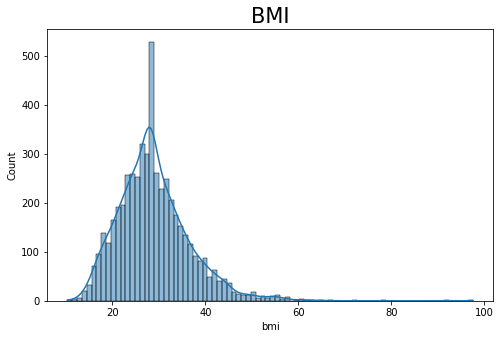

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(data_train['bmi'], kde=True)
plt.title('BMI', fontsize = 21)
plt.show()


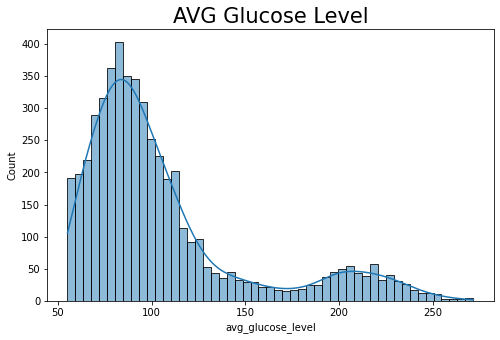

In [82]:
plt.figure(figsize=(8,5))
sns.histplot(data_train['avg_glucose_level'], kde=True)
plt.title('AVG Glucose Level', fontsize = 21)
plt.show()

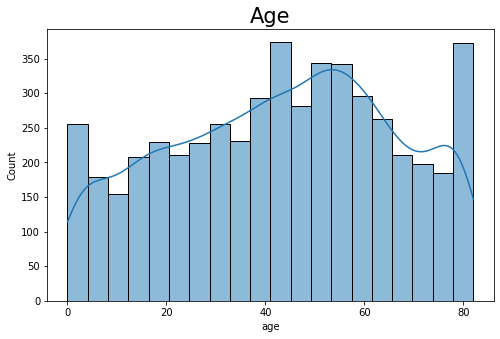

In [83]:
plt.figure(figsize=(8,5))
sns.histplot(data_train['age'], kde=True)
plt.title('Age', fontsize = 21)
plt.show()

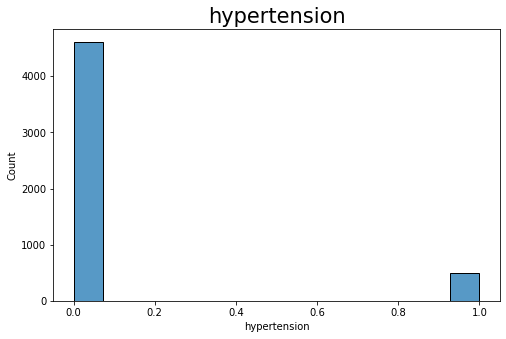

In [84]:
plt.figure(figsize=(8,5))
sns.histplot(data_train['hypertension'])
plt.title('hypertension', fontsize = 21)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


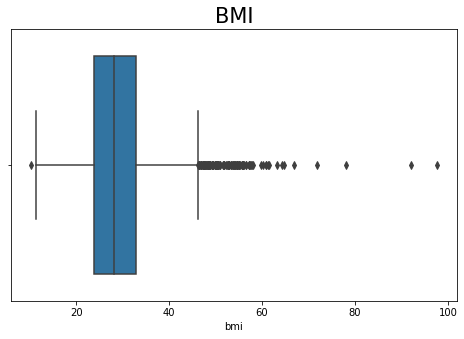

In [85]:

#Verificação de outliers  
plt.figure(figsize=(8,5))
sns.boxplot(data_train['bmi'])
plt.title('BMI', fontsize = 21)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Male   : 2115
Femela   : 2994


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


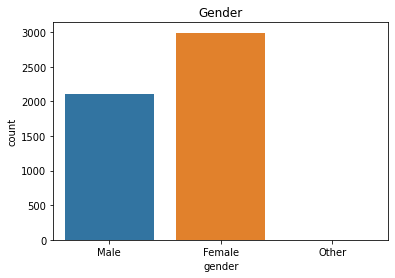

In [86]:
print("Male   :", data_train['gender'].value_counts()[1])
print("Femela   :", data_train['gender'].value_counts()[0])

sns.countplot(data_train['gender'])
sns.countplot(data_train['gender'])
plt.title('Gender')
plt.show()

In [100]:
X = data_train[['age' , 'bmi','hypertension' , 'heart_disease', 'avg_glucose_level' ]]
Y = data_train['stroke']

In [111]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.3 , random_state=1) 

In [112]:
#Avaliação
from sklearn.metrics import mean_squared_error , r2_score

In [113]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train , Y_train)

#Prediction

y_pred = LinearRegression.predict(X_test)

#Score

print(r2_score(Y_test , y_pred))
print(mean_squared_error(Y_test , y_pred))


0.09320529006656664
0.04643770654664089


In [114]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, Y_train)

#Prediction

y_pred = Ridge.predict(X_test)


#Score

print(r2_score(Y_test , y_pred))
print(mean_squared_error(Y_test , y_pred))





0.09318766891844055
0.046438608940200014


In [115]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, Y_train)

#Prediction

y_pred = Lasso.predict(X_test)


#Score

print(r2_score(Y_test , y_pred))
print(mean_squared_error(Y_test , y_pred))

0.009581143316443663
0.05072016821569993


In [116]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, Y_train)

#Prediction

y_pred = RandomForestRegressor.predict(X_test)


#Score

print(r2_score(Y_test , y_pred))
print(mean_squared_error(Y_test , y_pred))

0.037716729538845195
0.04927932159165036
